## Homework 1-3: Prediction using kNN and Regression Methods

使用kNN和回归方法进行预测

在本节中，我们的目标是让您熟悉k近邻、线性和多项式回归。这些方法在各行各业都有很强的应用，并且都是以预测为中心的。

具体而言，我们将：

1.加载iris数据集，该数据集分为训练和测试数据集
2.对数据集进行一些基本的探索性分析，并进行散点图
3.在不使用sklearn包的情况下写出kNN的算法
4.使用sklearn包实现kNN，并与我们手工实现的进行比较
5.将sklearn包扩展到线性和多项式回归

For this section, our goal is to get you familiarized with k-Nearest Neighbors, Linear, and Polynomial Regression. These methods find powerful applications in all walks of life and are centered around prediction. 


Specifically, we will: 
    
    1. Load in the iris dataset which is split into a training and testing dataset
    2. Do some basic exploratory analysis of the dataset and go through a scatterplot
    3. Write out the algorithm for kNN WITHOUT using the sklearn package
    4. Use the sklearn package to implement kNN and compare to the one we did by hand
    5. Extend the sklearn package to linear and polynomial regression 

For this section we will be using the following packages:

对于本节，我们将使用以下软件包：

In [1]:
import sys
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 999) #显示999行
pd.set_option('display.width', 500) #显示宽度500
pd.set_option('display.notebook_repr_html', True)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# Note --  Requires sklearn version .18 or higher  
from sklearn import metrics, datasets
from collections import Counter
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

assert(sys.version_info.major==3),print(sys.version)
# Python 3 or higher is required

## Review – Python list comprehensions 

回顾–Python列表理解

In [2]:
# Makes a list of all the even numbers from 0 to 20 
#列出从0到20的所有偶数

# with a for loop 使用for循环

l = []
for i in range(20):
    if i%2 ==0:
        l.append(i)
l

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

### Makes a list of even numbers from 0 to 20 using a python list comprehension 

使用python列表创建从0到20的偶数列表

In [3]:
## Your code here
i=[]
j=0
for n in range(20):
    if n%2==0:
        j+=1
        i.insert(j,n)
print(i)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]


## Load in the iris dataset and EDA:

加载iris数据集和EDA

The iris dataset can be found within the **sklearn** package and contains measurement data for three types of Iris' (a kind of flower): 1) Setosa, 2) Versicolour, and 3) Virginica.

iris数据集可在sklearn软件包中找到，包含三种iris（一种花）的测量数据：1) Setosa, 2) Versicolour, and 3) Virginica.

For each type of Iris, we have recorded the sepal length, sepal width, petal length, and petal width in centimeters. (The sepal can be basically thought of as the outer-most petal of a flower). 

对于每种类型的虹膜，我们都记录了萼片长度、萼片宽度、花瓣长度和花瓣宽度，单位为厘米。（萼片基本上可以被认为是一朵花最外层的花瓣）。

These four measurements were done on 50 unique Setosa, 50 unique Versicolour, and 50 unique Virginia flowers for a total of 150 unique flower measurements. 

这四个测量是在50个独特的Setosa、50个独特的Versicolour,和50个独特的Virginia花上进行的，总共150个独特的花测量。

In the dataset below, we will let the **target** variable designate the flower type by letting **0** represent Setosa, **1** represent Versicolour, and **2** represent Virginica. Now, we will load in the dataset:

在下面的数据集中，我们将让**target**变量通过**0**表示Setosa、**1**表示versicolor、**2**表示Virginica来指定花卉类型。现在，我们将在数据集中加载：

In [59]:
# Load in the dataset, which is contained in the sklearn package
#加载包含在sklearn包中的数据集
# Inital version of dataset is in dict-like container object
#数据集的初始版本位于类似dict的容器对象中

iris_bunch = datasets.load_iris()

# np.c_ is the numpy concatenate function which combines the data array and target array.
#  np.c_是结合数据数组和目标数组的numpy连接函数。
# The target array is our "Y" variable and the data array are the "X" variables. 
# 目标数组是我们的“Y”变量，数据数组是“X”变量。

iris = pd.DataFrame(data= np.c_[iris_bunch['data'], iris_bunch ['target']],
                     columns= iris_bunch['feature_names'] + ['target'])


iris.head(7) #head( )函数默认读取前五行数据，可以设置里面的值

#----------np.r_是按列连接两个矩阵，就是把两矩阵上下相加，要求列数相等。
#----------np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0


We can use the **describe()** function to summarize our dataset. When using the **describe()** function, some care should be taken to interpret the values based on what the data represent. For example, the **count** row shows we have 150 observations. The **target** column doesn't have too much interpretive value as the other columns as we are letting **0**, **1**, and **2** be **categorical** variables indicating which flower type was measured.

我们可以使用**descriple（）**函数来汇总数据集。使用**descripe（）**函数时，应注意根据数据表示的内容解释值。例如，**计数**行显示我们有150个观察值。**目标**列与其他列相比没有太多的解释值，因为我们让**0**、**1**和**2**成为**分类**变量，指示测量了哪种花类型。

In [5]:
print(iris_bunch)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [6]:
print("iris的数据",iris_bunch['data'])

iris的数据 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.

In [7]:
print("iris的标签，应该是由0,1,2三种标签组成",iris_bunch ['target'])

iris的标签，应该是由0,1,2三种标签组成 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


We can also use the groupby function to look at mean stats aggregated by flower type 

我们还可以使用groupby函数查看按花类型聚合的平均统计数据,groupby函数主要的作用是进行数据的分组以及分组后的组内运算！


In [64]:
print("按‘target’组，来个四项特征的值做均值\n",iris.groupby('target').mean())
print("\n\n")
print("做归一化之前的值\n",iris.head())

按‘target’组，来个四项特征的值做均值
         sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
target                                                                          
0.0                 5.006             3.428              1.462             0.246
1.0                 5.936             2.770              4.260             1.326
2.0                 6.588             2.974              5.552             2.026



做归一化之前的值
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
0                5.1               3.5                1.4               0.2     0.0
1                4.9               3.0                1.4               0.2     0.0
2                4.7               3.2                1.3               0.2     0.0
3                4.6               3.1                1.5               0.2     0.0
4                5.0               3.6                1.4               0.2     0.0


In general, it is good practice to normalize data before proceeding. As such, we can create the following functions:

一般来说，在继续之前规范化数据是一种良好的做法。因此，我们可以创建以下函数：

In [10]:
# Takes in a dataset and normalizes it. 
def normalize(x):
    num = x - np.min(x)
    denom = np.max(x) - np.min(x)
    return (num / denom)

#iloc函数：通过行号来取行数据,iloc[:,:]前面的冒号就是取行数，后面的冒号是取列数
iris.iloc[:, 0:4] = normalize(iris.iloc[:, 0:4])

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


Let's see what the describe function **AFTER** normalization:

让我们看看规范化后的函数描述：

In [11]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056,1.000000
std,0.230018,0.181611,0.299203,0.317599,0.819232
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,1.000000
75%,0.583333,0.541667,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


We can also use the **pairplot()** function to create a scatterplot matrix of our data:

我们还可以使用pairplot（）函数创建数据的散点图矩阵：

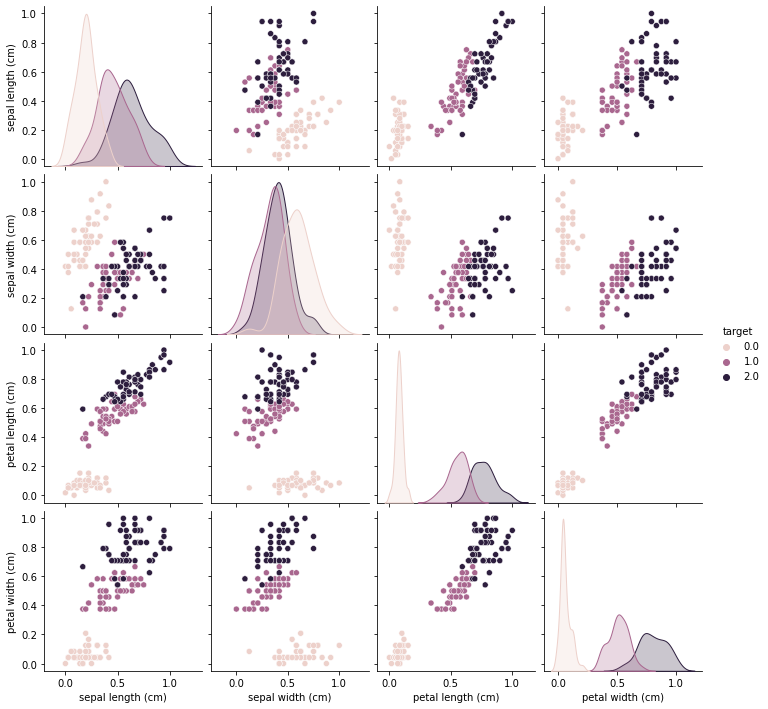

In [12]:
features_cols = iris.columns[:4]
sns.pairplot(data=iris,hue='target',vars=features_cols)

## Split up the data into a training set and a test set:

将数据分为训练集和测试集：

Now that we have an idea of what the data looks like, we would like to create a way to predict flower type (Setosa, Versicolour, or Virginica) based on our 4 predictor variables. Whatever method we use, it would be nice to have a way to assess how accurate our model is. Therefore, we will be breaking up the data into a **training** and a **testing** set. The **training** set will be used to train the model, while the **testing** set will be used to gauge how well our model does in general. The **testing** set is a way for us to ensure our model doesn't overfit our data.

现在我们已经知道了数据的样子，我们想根据我们的4个预测变量创建一种预测花型（刚毛、花色或弗吉尼亚）的方法。无论我们使用什么方法，最好能有一种方法来评估我们的模型有多精确。因此，我们将把数据分解为**培训**和**测试**集。**培训**集将用于培训模型，而**测试**集将用于衡量我们的模型总体表现如何。**测试**集是我们确保模型不会过度拟合数据的一种方法。

Let us first create a function that will randomly split the data up into a 70-30 split, with 70% of the data going into the **testing** set:

让我们首先创建一个函数，将数据随机分成70-30个部分，其中70%的数据进入测试集中：

In [69]:
def split_data(data):
    
    #确定我们在整个数据集中的观测数量：
    length=len(data)
    train_size=int(length*0.7)#取前70%为训练
    print("训练样本数：",train_size)
    
    
    #创建一个整数索引列表
    indices=list(range(length))
    
    
    #使用numpy的random.shuffle（）函数随机打乱索引：
    np.random.shuffle(indices)

    
    #为前70%的无序索引创建一个列表，并设置为training：
    training=indices[:train_size]
    print("训练集数据的标号：",training)
    
    
    #为其余30%的无序索引创建一个列表，并设置为测试：
    testing=indices[train_size:]
    print("测试集数据编号：",testing)
    
    
    #使用 训练的indices 列表查找相应的数据项：
    train=data.iloc[training] #iloc是取编号是training列表对应一行的数据
    print("训练集是：",train)
    
    
    #使用 测试indices 列表查找相应的数据项：
    test=data.iloc[testing]
    print("测试集是：",test)
    
    
    #返回两个数据帧，一个包含测试数据，一个包含训练数据：
    return train, test

We will now run the function and see if it returns actually what we want:

In [19]:
iris_train,iris_test  = split_data(iris)

# Return the dimensions of our training dataframe after using the split_data function:
# YOUR CODE GOES HERE

训练样本数： 105
训练集数据的标号： [87, 131, 29, 85, 107, 143, 126, 82, 109, 125, 6, 34, 40, 14, 108, 46, 144, 137, 62, 112, 116, 96, 21, 35, 47, 101, 7, 4, 59, 104, 33, 141, 84, 44, 89, 97, 72, 22, 57, 70, 64, 3, 120, 5, 118, 111, 58, 23, 15, 83, 90, 19, 52, 122, 50, 148, 30, 28, 95, 18, 56, 119, 133, 75, 80, 121, 63, 142, 8, 36, 127, 110, 54, 138, 88, 102, 37, 26, 93, 32, 42, 128, 9, 12, 27, 39, 86, 117, 2, 25, 74, 98, 66, 24, 45, 81, 1, 106, 13, 132, 135, 91, 146, 67, 105]
测试集数据编号： [38, 51, 11, 99, 92, 147, 94, 123, 49, 77, 31, 43, 134, 78, 16, 149, 65, 0, 124, 61, 145, 140, 68, 53, 136, 71, 55, 139, 10, 41, 69, 17, 114, 100, 130, 79, 60, 76, 113, 73, 48, 20, 129, 115, 103]
训练集是：      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
87            0.555556          0.125000           0.576271          0.500000     1.0
131           1.000000          0.750000           0.915254          0.791667     2.0
29            0.111111          0.500000           0.101695     

## Alternative approach using train_test_split from sklearn

使用sklearn中的train_test_split() 替代之前分测试训练数据的方法

In [35]:
train, test = train_test_split(iris, test_size=0.3)
print("训练集L:",train)
print("测试集:",test)

训练集L:      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  target
118           0.944444          0.250000           1.000000          0.916667     2.0
128           0.583333          0.333333           0.779661          0.833333     2.0
120           0.722222          0.500000           0.796610          0.916667     2.0
46            0.222222          0.750000           0.101695          0.041667     0.0
108           0.666667          0.208333           0.813559          0.708333     2.0
124           0.666667          0.541667           0.796610          0.833333     2.0
1             0.166667          0.416667           0.067797          0.041667     0.0
41            0.055556          0.125000           0.050847          0.083333     0.0
111           0.583333          0.291667           0.728814          0.750000     2.0
149           0.444444          0.416667           0.694915          0.708333     2.0
3             0.083333          0.458333        

## Implementing the kNN Algorithm by hand:

To really understand how the kNN algorithm works, it helps to go through the algorithm line by line in code.

要真正理解kNN算法是如何工作的，请在代码中逐行检查该算法。

In [23]:
def knn_algorithm(train, test, k):
    
    # 创建任何空列表来存储我们的预测
    predictions = []
    
    #取出预测值的特征名，比如sepal length (cm)，sepal width (cm)，除了target
    predictor_cols = [col for col in train.columns if col != 'target'] 
    
    # 从训练和测试集中分离 response 和 predictor 变量
    train_x = train[predictor_cols] 
    train_y = train['target']
    test_x  = test[predictor_cols]
    test_y  = test['target']
    
    for index, row in test_x.iterrows():

        # 对于每个测试点，存储所有训练点和测试点之间的距离
        vec_distances = pd.DataFrame((train_x.values - row.values)**2, index=train.index, columns = train_x.columns)

        # 然后，我们对每行的列求和，得到欧几里德距离的平方
        distances = vec_distances.sum(axis = 1)
        
        # 对到训练点的距离进行排序（按升序），并获取前k个点
        nearest_k = distances.sort_values().iloc[:k]
        # 为简单起见，我们省略了欧氏距离的平方根，因为平方根函数保持顺序。
        
        # 取最近k点对应的训练集y值的平均值
        k_mean = train_y[nearest_k.index].mean()
        
        # 将平均值添加到我们的预测y值列表中
        predictions.append(k_mean)
    
    # 使用测试的x值和预测的y值创建数据帧
    predict = test.copy()  
    predict['target'] = pd.Series(predictions, index=test.index)
    # Series 是pandas的一种数据结构，pd.Series([list],index=[list])，参数为list ,index为可选参数，若不填写则默认为index从0开始

    
    
    return predict

Now to run the algorithm on our dataset with $k = 5$:

In [24]:
k = 5
predicted_knn = knn_algorithm(iris_train, iris_test, k)
predicted_knn

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
38,0.027778,0.416667,0.050847,0.041667,0.0
51,0.583333,0.500000,0.593220,0.583333,1.0
11,0.138889,0.583333,0.101695,0.041667,0.0
99,0.388889,0.333333,0.525424,0.500000,1.0
92,0.416667,0.250000,0.508475,0.458333,1.0
147,0.611111,0.416667,0.711864,0.791667,2.0
94,0.361111,0.291667,0.542373,0.500000,1.0
123,0.555556,0.291667,0.661017,0.708333,1.8
49,0.194444,0.541667,0.067797,0.041667,0.0
77,0.666667,0.416667,0.677966,0.666667,1.4


We want to have a way to evaluate our predictions from the kNN algorithm with $k=5$. One way is to compute the $R^2$ coefficient. Let's create a function for that:

我们想有一种方法来评估kNN算法的预测结果𝑘=5.一种方法是计算𝑅2系数。让我们为其创建一个函数：

In [29]:
def evaluate(predicted, true):
    # 查找平方误差：
    squared_error = (predicted['target'] - true['target'])**2
    
    # 查找均方误差：
    error_var = squared_error.sum()
    sample_var = ((true['target'] - true['target'].mean())**2).sum()
    
    r = (1 - (error_var / sample_var))
    
    return r

然后让我们把这个函数应用到我们的预测中：

In [31]:
print('准确度是：',evaluate(predicted_knn, iris_test))

准确度是： 0.9696141479099678


We see that the coefficient for the Nearest Neighbors implementation with $k=5$ is $R^2 = 0.9745$, which should more or less match what we get with the sklearn package. 

我们看到最近邻实现的系数𝑘=5是𝑅2=0.9745，这应该或多或少与我们从sklearn软件包中获得的内容相匹配。

## Now using sklearn to implement kNN:

We will now use the **sklearn** package to implement kNN:

Here, we will split our data using the train_test_split function from sklearn.

我们现在将使用sklearn包来实现kNN：
在这里，我们将使用sklearn的train_test_split函数分割数据。

In [37]:
# 现在我们可以使用sklearn的train_test_split函数分割数据：
train, test =  train_test_split(iris, test_size=.3)

x_train, x_test = train[features_cols], test[features_cols] #将特征（长度、宽度）的训练值、测试值赋值。
y_train, y_test = train['target'], test['target']



Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')


Then, we can fit the model and use various metrics to assess our accuracy:

然后，我们可以拟合模型并使用各种指标来评估我们的准确性：

We can also introduce a Confusion Matrix:

我们还可以引入混淆矩阵：

In [38]:
# Set kNN parameter:
k = 10

# 现在我们可以拟合模型，预测我们感兴趣的变量，然后评估拟合度：
# 首先，我们创建分类器对象：
neighbors = KNeighborsClassifier(n_neighbors=k)

# 然后，我们使用x_train 作为训练数据，y_train 作为目标值来拟合模型：
neighbors.fit(x_train, y_train)

# Retreieve our predictions:
prediction_knn = neighbors.predict(x_test)

# 这将返回给定测试数据和标签的平均精度，或者换句话说，
# R平方值——一个常数模型，总是预测y的期望值, 
# 忽略输入特征， 将得到一个 R^2 score of 1.
r = neighbors.score(x_test, y_test)
r


0.9777777777777777

In [39]:
expected_knn = y_test
predicted_knn = neighbors.predict(x_test)
print(metrics.classification_report(expected_knn, predicted_knn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.93      1.00      0.97        14
         2.0       1.00      0.94      0.97        18

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [40]:
pd.DataFrame(metrics.confusion_matrix(expected_knn, predicted_knn))

,0,1,2
0,13,0,0
1,0,14,0
2,0,1,17


In the above, 4 flowers belonging to class 3 were mis-classified as class 2, while 2 flowers of class 2 were mis-classified as class 3. A confusion matrix allows us to view where our inaccurate predictions lie in a simple "snapshot" style matrix.

# Linear and Polynomial Regression

线性和多项式回归

We just went over the kNN prediction method. Now, we will fit the same data, but onto linear and polynomial regressions.

我们刚刚讨论了kNN预测方法。现在，我们将拟合相同的数据，但采用线性和多项式回归。

## Linear Regression:


我们将一如既往地使用训练/测试数据集，并创建线性回归对象。

We will use the training/testing dataset as before and create our linear regression objects.

In [41]:
from statsmodels.api import OLS
# 我们必须首先从sklearn创建线性回归对象：
regr = LinearRegression()
# 然后，我们将为 .fit（）函数输入训练集：
regr.fit(x_train, y_train)
# 这将打印我们模型的回归系数：
print(regr.coef_)

[-0.2297137  -0.15939125  1.35233179  1.30765425]


In [43]:
import statsmodels.api as sm
# 我们必须首先从统计模型创建线性回归对象：
model = sm.OLS(y_train.values, x_train)
regr = model.fit()
# 这将打印我们模型的回归系数：
regr.params

sepal length (cm)   -0.165350
sepal width (cm)    -0.278848
petal length (cm)    1.200000
petal width (cm)     1.364976
dtype: float64

Now, we will compute metrics that can be used to assess fit:

现在，我们将计算可用于评估适合度的指标：

In [44]:
# 要计算均方误差（请注意，我们现在使用的是测试集）：
np.mean((regr.predict(x_test)-y_test)**2)

0.04770638084253394

In [45]:
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              805.7
Date:                Thu, 04 Nov 2021   Prob (F-statistic):                    1.18e-75
Time:                        13:58:19   Log-Likelihood:                          11.025
No. Observations:                 105   AIC:                                     -14.05
Df Residuals:                     101   BIC:                                     -3.434
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
sepal length (cm)    -0.1653      0.241     -0.687      0.494      -0.643       0.312
sepal width (cm)     -0.2788      0.085     -3.269      0.001      -0.448      -0.110
petal length (cm)     1.2000      0.336      3.575      0.001       0.534       1.866
petal width (cm)      1.3650      0.257      5.320      0.000       0.856       1.874
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   1.871
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.040
Skew:                           0.018   Prob(JB):                        0.980
Kurtosis:                       3.088   Cond. No.                         19.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Instead of focusing on $R^2$, let’s look at the classification stats..

而不是专注于$R^2$，让我们看看分类统计数据。。

In [46]:
predicted_knn = np.round(regr.predict(x_test))
print(metrics.classification_report(expected_knn, predicted_knn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00        14
         2.0       1.00      1.00      1.00        18

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [47]:
pd.DataFrame(metrics.confusion_matrix(expected_knn, predicted_knn))

,0,1,2
0,13,0,0
1,0,14,0
2,0,0,18



## Polynomial Regression
多项式回归

Polynomial regression is useful when you suspect a non-linear relationship between the predictor variables $x$ and the conditional expectation of $y$. Specifically, it is a special case of linear regression where the predictor variables are modeled through an $n$th degree polynomial. In Python, we can create the polynomial features through scikit-learn's PolynomialFeatures package. Then, we can use linear regression to implement a polynomial regression model. 

当您怀疑预测变量之间存在非线性关系时，多项式回归非常有用𝑥  以及𝑦 . 具体而言，这是线性回归的一种特殊情况，其中预测变量通过𝑛 次多项式。在Python中，我们可以通过scikit learn的多项式特性包创建多项式特性。然后，我们可以使用线性回归来实现多项式回归模型。

We first need to create the PolynomialFeatures object and specify to what degree we wish to take our polynomial to:

我们首先需要创建PolynomialFeatures对象，并指定我们希望多项式达到的程度：

In [48]:
# 创建多项式特征对象并指定度数：
degree = 2
poly = PolynomialFeatures(degree)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
pd.DataFrame(x_train_poly).shape

(105, 15)

In [49]:
# 创建线性回归对象
lg = LinearRegression()

# 用多项式特征拟合我们的训练数据
lg.fit(x_train_poly, y_train)

# 获取系数(coefficients)
lg.coef_

array([ 0.        , -2.53160701,  0.47441836,  2.64930769,  0.89083629,
       -7.28601203,  8.32020998,  9.75864636,  0.8598173 , -1.52924631,
       -5.98375566, -1.04688665,  1.96502281, -9.40473663,  5.0445522 ])

Now we can also do prediction:

现在我们还可以做预测：

In [50]:
# 根据我们的测试集拟合多项式回归模型进行预测。
poly.predicted = lg.predict(x_test_poly)
poly.predicted

array([ 1.77859539,  1.95554592,  0.01447794,  1.07401258,  1.45902187,
        2.0404775 ,  1.64569816,  1.23553019,  1.87988582,  1.0344208 ,
        1.45558287, -0.07997062,  2.11337578,  1.15407069,  1.73079558,
        0.13366775, -0.02000091,  2.08102668,  2.27914229,  1.14442552,
        0.01482874,  0.00784173,  1.23473989,  0.05196596,  0.00727364,
        1.04844991,  2.24038543,  0.04715768,  0.02594968,  0.92261242,
        1.57070953,  1.8160419 ,  1.73079558, -0.05014169,  1.60638509,
        1.05780619,  1.23679166,  1.50407389,  1.14330953,  1.03707364,
        2.13713636,  0.95581766,  0.04739097,  0.05907657,  0.95022346])

In [51]:
# 计算多项式回归的均方误差：
np.mean((poly.predicted-y_test)**2)

0.05449070622941982

In [52]:
predicted_knn = np.round(poly.predicted)
print(metrics.classification_report(expected_knn, predicted_knn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       0.88      1.00      0.93        14
         2.0       1.00      0.89      0.94        18

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [53]:
pd.DataFrame(metrics.confusion_matrix(expected_knn, predicted_knn))

,0,1,2
0,13,0,0
1,0,14,0
2,0,2,16
